In [ ]:
# default_exp core

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import fbprophet
fbprophet.__version__

'0.7.1'

In [ ]:
# Use the numenta NAB dataset from here: https://github.com/numenta/NAB/data/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, Image

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
df = pd.read_csv('data/ec2_cpu_utilization_5f5533.csv',parse_dates=True)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['timestamp'] = df['timestamp'].dt.strftime('%Y/%m/%d %H:%M:%S')

In [ ]:
df.head()

,timestamp,value
0,2014/02/14 14:27:00,51.846
1,2014/02/14 14:32:00,44.508
2,2014/02/14 14:37:00,41.244
3,2014/02/14 14:42:00,48.568
4,2014/02/14 14:47:00,46.714


In [ ]:
df.rename(columns={"timestamp": "ds", "value": "y"}, inplace=True)

In [ ]:
df

,ds,y
0,2014/02/14 14:27:00,51.846
1,2014/02/14 14:32:00,44.508
2,2014/02/14 14:37:00,41.244
3,2014/02/14 14:42:00,48.568
4,2014/02/14 14:47:00,46.714
...,...,...
4027,2014/02/28 14:02:00,38.474
4028,2014/02/28 14:07:00,40.352
4029,2014/02/28 14:12:00,37.912
4030,2014/02/28 14:17:00,38.458


In [ ]:
m = Prophet(growth="flat",
    )
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=10, freq='D')
future

,ds
0,2014-02-14 14:27:00
1,2014-02-14 14:32:00
2,2014-02-14 14:37:00
3,2014-02-14 14:42:00
4,2014-02-14 14:47:00
...,...
4037,2014-03-06 14:22:00
4038,2014-03-07 14:22:00
4039,2014-03-08 14:22:00
4040,2014-03-09 14:22:00


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4037,2014-03-06 14:22:00,39.008037,29.751482,49.650872
4038,2014-03-07 14:22:00,39.104843,27.244669,51.925829
4039,2014-03-08 14:22:00,39.201649,25.178335,54.257897
4040,2014-03-09 14:22:00,39.298456,22.055024,58.254261
4041,2014-03-10 14:22:00,39.395262,19.016112,61.529186


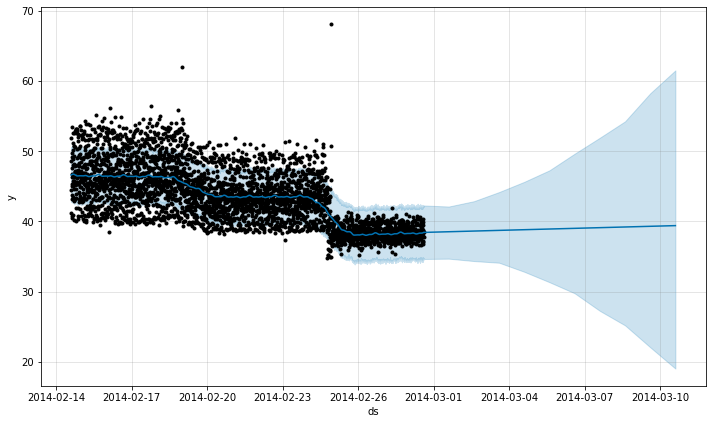

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

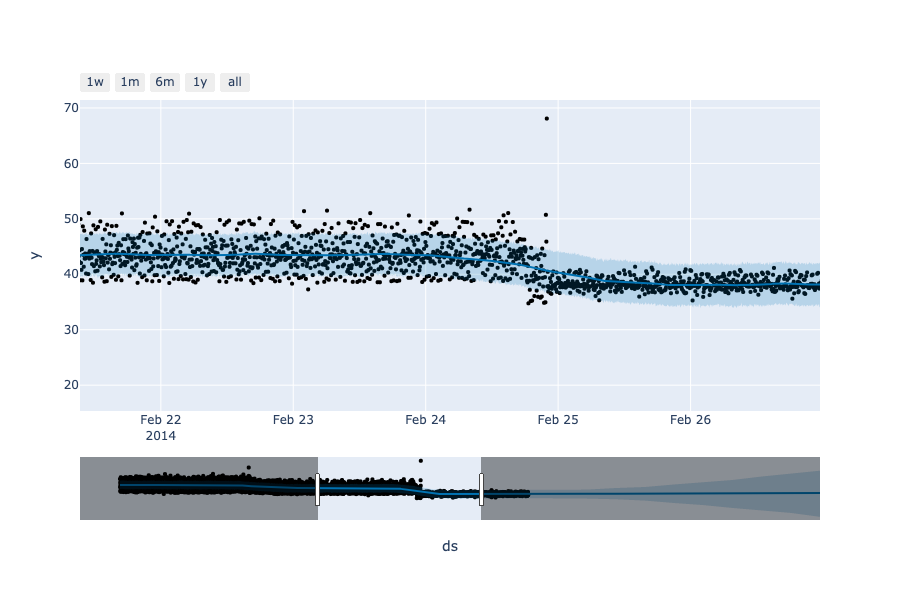

In [ ]:
display(Image("data/plotly-zoomed-in.png"))

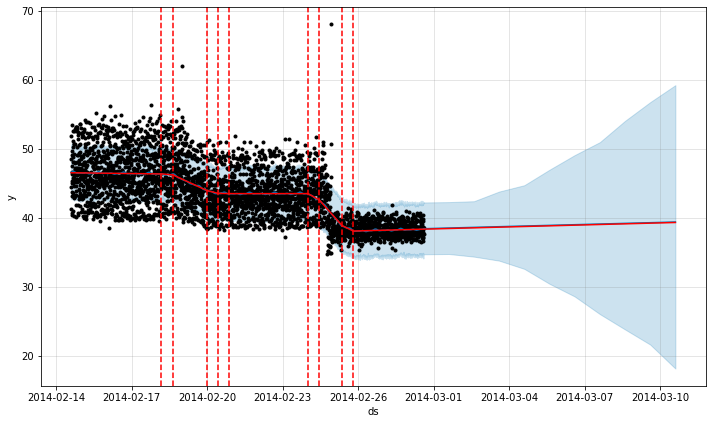

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

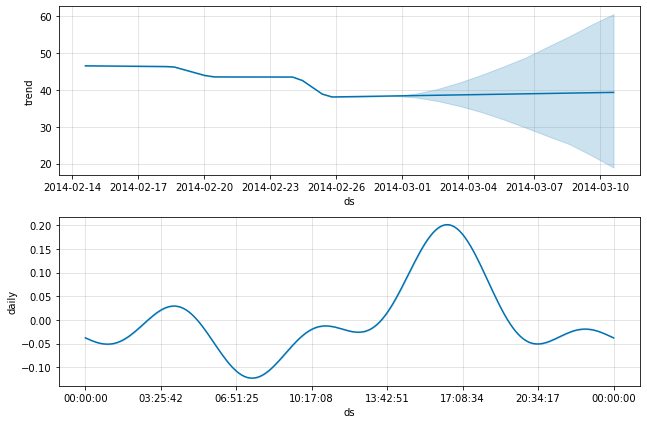

In [ ]:
fig = m.plot_components(forecast)

In [ ]:
m_cv = cross_validation(m, horizon='2 days')

INFO:fbprophet:Making 6 forecasts with cutoffs between 2014-02-21 14:22:00 and 2014-02-26 14:22:00
100%|██████████| 6/6 [00:12<00:00,  2.07s/it]


In [ ]:
m_pm = performance_metrics(m_cv)

In [ ]:
m_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 04:50:00,6.638255,2.576481,1.977210,0.047298,0.037078,0.885507
1,0 days 04:55:00,6.790311,2.605823,1.995817,0.047840,0.037194,0.886957
2,0 days 05:00:00,6.663206,2.581319,1.973935,0.047365,0.037194,0.891304
3,0 days 05:05:00,6.660078,2.580713,1.974196,0.047440,0.037194,0.889855
4,0 days 05:10:00,6.676592,2.583910,1.971510,0.047396,0.037194,0.886957
...,...,...,...,...,...,...,...
514,1 days 23:40:00,21.687310,4.656964,4.186575,0.106685,0.114445,0.497101
515,1 days 23:45:00,21.884085,4.678043,4.204646,0.106960,0.113864,0.497101
516,1 days 23:50:00,21.843180,4.673669,4.197312,0.106792,0.114445,0.498551
517,1 days 23:55:00,21.852851,4.674703,4.200101,0.106871,0.114445,0.500000


In [ ]:
mape = m_pm.mape.mean()
mape

0.0799000213394311